**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_ASSAY = "CRISPRi_Growth_K562_Gersbach_JinWoo"

In [3]:
txt_assay = TXT_ASSAY
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "guide_scores")
dir(txt_fdiry)

[1] "CRISPRi_Growth_K562.hg38.ZScore.unstranded.bed.gz"
[2] "CRISPRi_rAVG_log2FC_2.bed"                        
[3] "CRISPRi_rAVG_log2FC_2.wig"                        
[4] "summary"

In [4]:
txt_assay = TXT_ASSAY
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "guide_scores", "summary")
dir(txt_fdiry)

[1] "description.tsv" "metadata.tsv"    "track_info.tsv"

In [5]:
txt_assay = TXT_ASSAY
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "guide_scores", "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
vec_txt_cname = dat$Name
vec_txt_cname

[1] "Chrom"      "ChromStart" "ChromEnd"   "Name"       "Score"     
[6] "Strand"

In [6]:
### set directory
txt_assay = TXT_ASSAY
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "guide_scores")
txt_fname = "CRISPRi_Growth_K562.hg38.ZScore.unstranded.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### 
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

###
dat_score_import = dat
print(dim(dat))
print(table(dat$Chrom))
head(dat)

[1] 1083147       6

  chr1  chr10  chr11  chr12  chr13  chr14  chr15  chr16  chr17  chr18  chr19 
125703  47063  59909  51243  14130  26919  36311  52263  61626  15509  63449 
  chr2  chr20  chr21  chr22   chr3   chr4   chr5   chr6   chr7   chr8   chr9 
 72171  34643  17332  27969  57272  34858  50169  59272  62697  40884  44540 
  chrX 
 27215 


Chrom,ChromStart,ChromEnd,Name,Score,Strand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,605580,605581,id-1,-0.180660,.
chr1,605581,605582,id-2,0.486646,.
chr1,605589,605590,id-3,3.171240,.
chr1,605591,605592,id-4,-0.364573,.
chr1,605592,605593,id-5,-0.206319,.
chr1,605609,605610,id-6,-0.266750,.


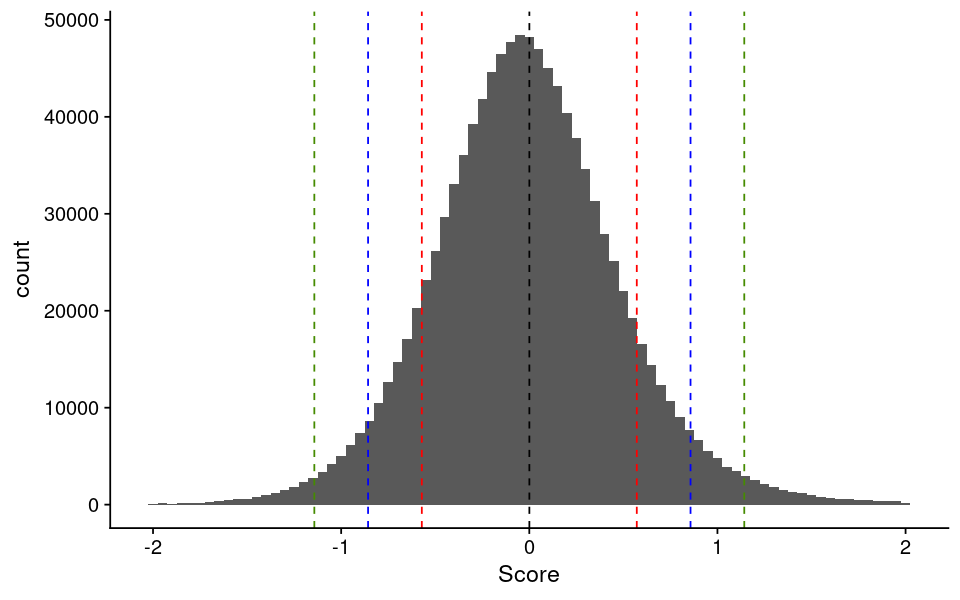

In [7]:
### init
dat = dat_score_import
vec = dat$Score

### stats
val_mu = mean(vec)
val_sd = sd(vec)
vec_sd = c(val_sd, -val_sd)

### visualize
dat = dat %>% dplyr::filter(abs(Score) < 2)
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.05) +
    geom_vline(xintercept = val_mu,       linetype="dashed", color="black") +
    geom_vline(xintercept = vec_sd * 1.0, linetype="dashed", color="red") +
    geom_vline(xintercept = vec_sd * 1.5, linetype="dashed", color="blue") +
    geom_vline(xintercept = vec_sd * 2.0, linetype="dashed", color="chartreuse4") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [16]:
### set directory
txt_assay = TXT_ASSAY
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "guide_scores")
txt_fname = "CRISPRi_Growth_K562.hg38.ZScore.unstranded.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### 
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

###
dat_score_import = dat
print(dim(dat))
print(table(dat$Chrom))
head(dat)

[1] 49986     6

 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr21 
   60    58    89    30    67    27    34     8     7    29     2    63    21 
 chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX 
   48    99    68    58    66 49078    38    36 


Chrom,ChromStart,ChromEnd,Name,Score,Strand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,74582275,74582276,id-1,0.440890,.
chr1,74582309,74582310,id-2,1.256270,.
chr1,80526338,80526339,id-3,0.146948,.
chr1,102025739,102025740,id-4,-0.389965,.
chr1,102026463,102026464,id-5,-0.983594,.
chr1,102522706,102522707,id-6,-0.050346,.


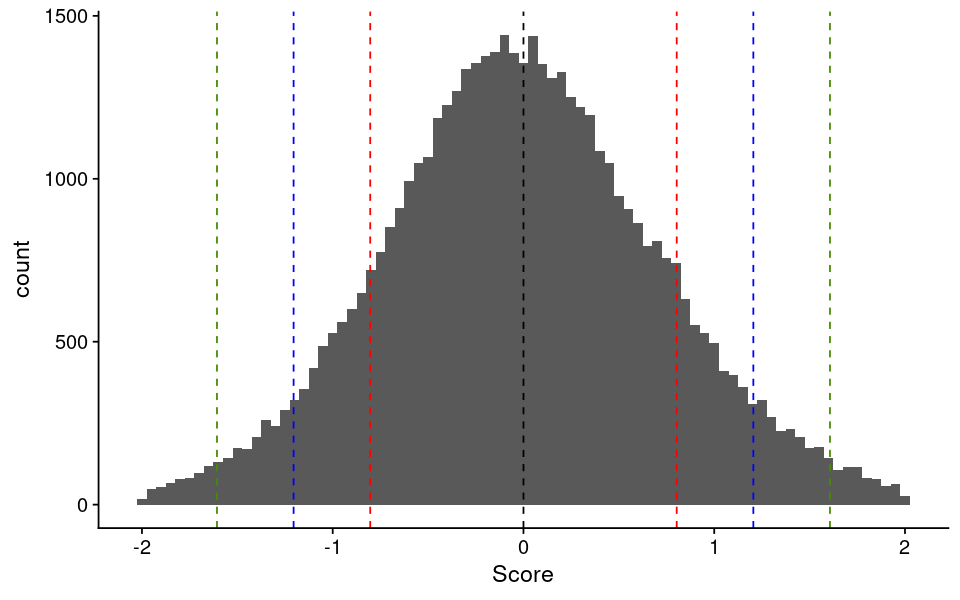

In [20]:
### init
dat = dat_score_import
vec = dat$Score

### stats
val_mu = mean(vec)
val_sd = sd(vec)
vec_sd = c(val_sd, -val_sd)

### visualize
dat = dat %>% dplyr::filter(abs(Score) < 2)
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.05) +
    geom_vline(xintercept = val_mu,       linetype="dashed", color="black") +
    geom_vline(xintercept = vec_sd * 1.0, linetype="dashed", color="red") +
    geom_vline(xintercept = vec_sd * 1.5, linetype="dashed", color="blue") +
    geom_vline(xintercept = vec_sd * 2.0, linetype="dashed", color="chartreuse4") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [39]:
txt_chrom = "chrX"
num_chrom_start = 50749700
num_chrom_end   = 53716000

dat = dat_score_import
dat = dat %>% 
    dplyr::filter(
        Chrom == txt_chrom,
        ChromStart > num_chrom_start,
        ChromEnd   < num_chrom_end,
    )
print(dim(dat))
head(dat)

[1] 1 6


Chrom,ChromStart,ChromEnd,Name,Score,Strand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chrX,52032569,52032570,id-49969,0.076659,.


## Check

In [29]:
txt_fdiry = file.path(FD_WORK, "proj_encode_fcc")
dir(txt_fdiry)

[1] "data"              "log"               "Readme.md"        
[4] "results"           "results_v1.tar.gz" "results_v2.tar.gz"
[7] "results_v3.tar.gz" "results_v4"        "source"

In [35]:
###
txt_fdiry = file.path(FD_WORK, "proj_encode_fcc", "results_v4", "CRISPRi_Growth_K562_Gersbach", "coverage")
txt_fname = "CRISPRi_rAVG_log2FC_2.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

###
vec = c("Chrom", "ChromStart", "ChromEnd", "Name", "Score")
dat = read_tsv(txt_fpath, col_names = vec, show_col_types = FALSE)

###
dat_score_check = dat
print(dim(dat))
head(dat)

[1] 1083147       5


Chrom,ChromStart,ChromEnd,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr1,605580,605581,id-1,-0.180660
chr1,605581,605582,id-2,0.486646
chr1,605589,605590,id-3,3.171240
chr1,605591,605592,id-4,-0.364573
chr1,605592,605593,id-5,-0.206319
chr1,605609,605610,id-6,-0.266750


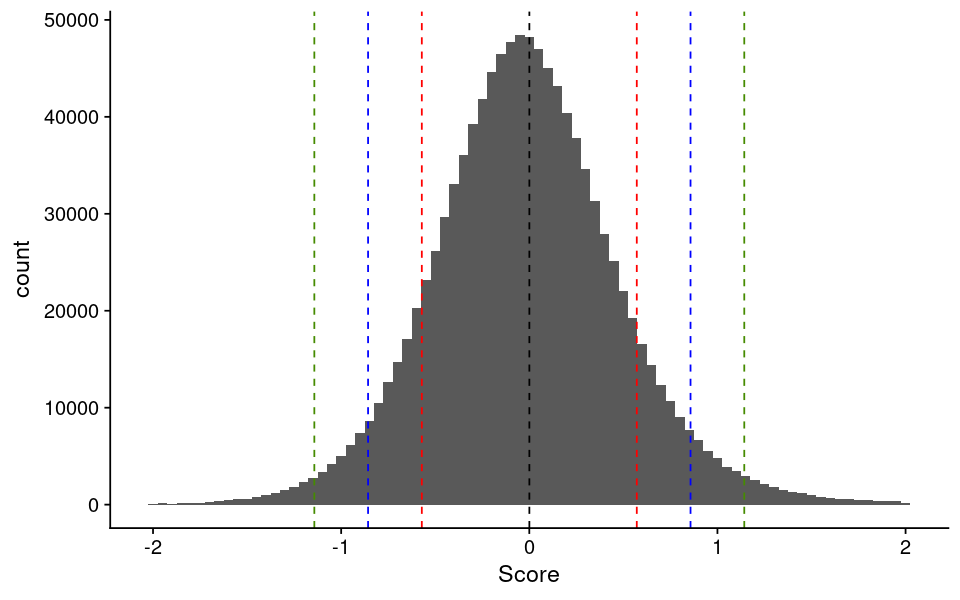

In [36]:
### init
dat = dat_score_check
vec = dat$Score

### stats
val_mu = mean(vec)
val_sd = sd(vec)
vec_sd = c(val_sd, -val_sd)

### visualize
dat = dat %>% dplyr::filter(abs(Score) < 2)
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.05) +
    geom_vline(xintercept = val_mu,       linetype="dashed", color="black") +
    geom_vline(xintercept = vec_sd * 1.0, linetype="dashed", color="red") +
    geom_vline(xintercept = vec_sd * 1.5, linetype="dashed", color="blue") +
    geom_vline(xintercept = vec_sd * 2.0, linetype="dashed", color="chartreuse4") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [38]:
txt_chrom = "chrX"
num_chrom_start = 50749700
num_chrom_end   = 53716000

dat = dat_score_check
dat = dat %>% 
    dplyr::filter(
        Chrom == txt_chrom,
        ChromStart > num_chrom_start,
        ChromEnd   < num_chrom_end,
    )
print(dim(dat))
head(dat)

[1] 856   5


Chrom,ChromStart,ChromEnd,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chrX,50903783,50903784,id-1066174,-0.310595
chrX,50903787,50903788,id-1066175,0.270760
chrX,50903791,50903792,id-1066176,0.266861
chrX,50903792,50903793,id-1066177,0.400838
chrX,50903793,50903794,id-1066178,0.087993
chrX,50903805,50903806,id-1066179,-0.323086
